# CNN para classificar imagens de frutas

In [1]:
import json
import numpy as np
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
with open("fruta2id.json", mode="r") as f:
    fruta2id = json.load(f)

In [3]:
fruta2id

{'Apple Red Yellow 2': 0,
 'Cherry 2': 1,
 'Cherry Rainier': 2,
 'Melon Piel de Sapo': 3,
 'Peach 2': 4,
 'Pear Forelle': 5,
 'Pear Red': 6,
 'Pepper Red': 7,
 'Pepper Yellow': 8,
 'Strawberry Wedge': 9,
 'Tomato 1': 10,
 'Tomato 2': 11,
 'Tomato 3': 12,
 'Walnut': 13}

In [4]:
dados = np.load("frutas.npz")
x_train = dados['x_train']
x_val = dados['x_val']
x_test = dados['x_test']
y_train = to_categorical(dados['y_train'])
y_val = to_categorical(dados['y_val'])
y_test = to_categorical(dados['y_test'])

# Arquitetura da rede
<p>Para este problema apenas uma camada oculta, e com menos neurônios, funcionou.</p>

In [5]:
from keras.layers import Input, Dense, Conv2D, SpatialDropout2D, MaxPooling2D, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [6]:
entrada = Input(shape=(x_train.shape[1:]))
conv1 = Conv2D(16, 2, activation='relu', padding='same')(entrada)
max1 = MaxPooling2D()(conv1)
conv2 = Conv2D(32, 2, activation='relu', padding='same')(max1)
max2 = MaxPooling2D()(conv2)
conv3 = Conv2D(64, 2, activation='relu', padding='same')(max2)
max3 = MaxPooling2D()(conv3)
conv4 = Conv2D(128, 2, activation='relu', padding='same')(max3)
max4 = MaxPooling2D()(conv4)
spatial_drop = SpatialDropout2D(0.3)(max4)
flatten = Flatten()(spatial_drop)
densa = Dense(150, activation='relu')(flatten)
densa_drop = Dropout(0.4)(densa)
saida = Dense(len(fruta2id), activation='softmax')(densa_drop)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model = Model(entrada, saida)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
__________

### Para mostrar alternativas, alterei o otimizador nesta rede
### Também adicionei a métrica acurácia (accuracy)

In [8]:
adam = Adam(lr=0.0001)
model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
BATCH_SIZE = 32
NUM_EPOCHS = 5

In [10]:
checkpoint = ModelCheckpoint(filepath = 'model_frutas_{epoch:02d}.hdf5', save_best_only = True)

# Treinamento

In [11]:
history = model.fit(x=x_train, y=y_train, batch_size=32, callbacks=[checkpoint], validation_data=(x_val, y_val), epochs=NUM_EPOCHS)

Instructions for updating:
Use tf.cast instead.
Train on 6961 samples, validate on 2984 samples
Epoch 1/5
6961/6961 [==============================] - 80s 11ms/step - loss: 14.4183 - acc: 0.0915 - val_loss: 13.7188 - val_acc: 0.1481
Epoch 2/5
6961/6961 [==============================] - 78s 11ms/step - loss: 5.5601 - acc: 0.3270 - val_loss: 0.5825 - val_acc: 0.9021
Epoch 3/5
6961/6961 [==============================] - 81s 12ms/step - loss: 0.7447 - acc: 0.7400 - val_loss: 0.0913 - val_acc: 0.9775
Epoch 4/5
6961/6961 [==============================] - 84s 12ms/step - loss: 0.3196 - acc: 0.8848 - val_loss: 0.0355 - val_acc: 0.9940
Epoch 5/5
6961/6961 [==============================] - 85s 12ms/step - loss: 0.1996 - acc: 0.9273 - val_loss: 0.0172 - val_acc: 0.9973


### Daqui em diante utilizei o parâmetro initial_epoch para retomar o treinamento.

In [12]:
history2 = model.fit(x=x_train, y=y_train, batch_size=32, callbacks=[checkpoint], validation_data=(x_val, y_val), 
                     epochs=NUM_EPOCHS+5, initial_epoch=NUM_EPOCHS)

Train on 6961 samples, validate on 2984 samples
Epoch 6/10
6961/6961 [==============================] - 85s 12ms/step - loss: 0.1412 - acc: 0.9503 - val_loss: 0.0093 - val_acc: 0.9983
Epoch 7/10
6961/6961 [==============================] - 86s 12ms/step - loss: 0.0855 - acc: 0.9718 - val_loss: 0.0039 - val_acc: 0.9997
Epoch 8/10
6961/6961 [==============================] - 83s 12ms/step - loss: 0.0732 - acc: 0.9753 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 9/10
6961/6961 [==============================] - 81s 12ms/step - loss: 0.0539 - acc: 0.9825 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 10/10
6961/6961 [==============================] - 82s 12ms/step - loss: 0.0422 - acc: 0.9868 - val_loss: 0.0012 - val_acc: 1.0000


In [13]:
history3 = model.fit(x=x_train, y=y_train, batch_size=32, callbacks=[checkpoint], validation_data=(x_val, y_val), 
                     epochs=15, initial_epoch=10)

Train on 6961 samples, validate on 2984 samples
Epoch 11/15
6961/6961 [==============================] - 82s 12ms/step - loss: 0.0483 - acc: 0.9858 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 12/15
6961/6961 [==============================] - 82s 12ms/step - loss: 0.0249 - acc: 0.9927 - val_loss: 6.2679e-04 - val_acc: 1.0000
Epoch 13/15
6961/6961 [==============================] - 82s 12ms/step - loss: 0.0264 - acc: 0.9921 - val_loss: 5.6902e-04 - val_acc: 1.0000
Epoch 14/15
6961/6961 [==============================] - 82s 12ms/step - loss: 0.0212 - acc: 0.9922 - val_loss: 4.5393e-04 - val_acc: 1.0000
Epoch 15/15
6961/6961 [==============================] - 82s 12ms/step - loss: 0.0218 - acc: 0.9938 - val_loss: 8.4468e-04 - val_acc: 1.0000


In [14]:
history4 = model.fit(x=x_train, y=y_train, batch_size=32, callbacks=[checkpoint], validation_data=(x_val, y_val), 
                     epochs=20, initial_epoch=15)

Train on 6961 samples, validate on 2984 samples
Epoch 16/20
6961/6961 [==============================] - 81s 12ms/step - loss: 0.0190 - acc: 0.9930 - val_loss: 2.6153e-04 - val_acc: 1.0000
Epoch 17/20
6961/6961 [==============================] - 81s 12ms/step - loss: 0.0178 - acc: 0.9947 - val_loss: 2.5036e-04 - val_acc: 1.0000
Epoch 18/20
6961/6961 [==============================] - 83s 12ms/step - loss: 0.0195 - acc: 0.9941 - val_loss: 5.4295e-04 - val_acc: 1.0000
Epoch 19/20
6961/6961 [==============================] - 82s 12ms/step - loss: 0.0110 - acc: 0.9968 - val_loss: 2.4985e-04 - val_acc: 1.0000
Epoch 20/20
6961/6961 [==============================] - 82s 12ms/step - loss: 0.0143 - acc: 0.9961 - val_loss: 1.5197e-04 - val_acc: 1.0000


# Curva de Aprendizado

In [16]:
import matplotlib.pyplot as plt

In [17]:
# concatenando listas
losses = history.history['loss'] + history2.history['loss'] + history3.history['loss'] + history4.history['loss']
losses = np.array(losses)
val_losses = (history.history['val_loss'] + history2.history['val_loss'] + 
              history3.history['val_loss'] + history4.history['val_loss'])
val_losses = np.array(val_losses)
# acurácia
accuracies = history.history['acc'] + history2.history['acc'] + history3.history['acc'] + history4.history['acc']
accuracies = np.array(accuracies)
val_accuracies = (history.history['val_acc'] + history2.history['val_acc'] + 
                  history3.history['val_acc'] + history4.history['val_acc'])
val_accuracies = np.array(val_accuracies)

# Loss durante o treinamento

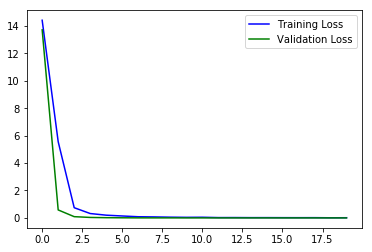

In [21]:
plt.plot(range(len(losses)), losses, 'b', label="Training Loss")
plt.plot(range(len(val_losses)), val_losses, 'g', label="Validation Loss")
plt.legend()

### A primeira época é bem distinta, vamos olhar da terceira para frente

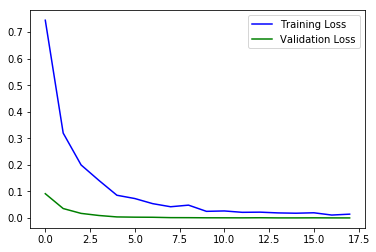

In [25]:
plt.plot(range(len(losses[2:])), losses[2:], 'b', label="Training Loss")
plt.plot(range(len(val_losses[2:])), val_losses[2:], 'g', label="Validation Loss")
plt.legend()

# Acurácia durante o treinamento

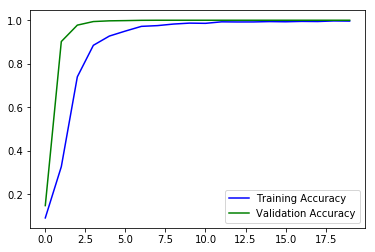

In [22]:
plt.plot(range(len(accuracies)), accuracies, 'b', label="Training Accuracy")
plt.plot(range(len(val_accuracies)), val_accuracies, 'g', label="Validation Accuracy")
plt.legend()

In [26]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from keras.models import load_model

In [27]:
melhor_modelo = load_model("model_frutas_20.hdf5")  # a última ter sido a melhor foi coincidência

In [28]:
predicoes = melhor_modelo.predict(x_test)

In [29]:
print(classification_report(dados['y_test'], np.argmax(predicoes, axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       1.00      1.00      1.00       246
           2       1.00      1.00      1.00       246
           3       1.00      1.00      1.00       246
           4       1.00      1.00      1.00       246
           5       1.00      1.00      1.00       234
           6       1.00      1.00      1.00       222
           7       1.00      1.00      1.00       222
           8       1.00      1.00      1.00       222
           9       1.00      1.00      1.00       246
          10       1.00      1.00      1.00       246
          11       1.00      1.00      1.00       225
          12       1.00      1.00      1.00       246
          13       1.00      1.00      1.00       249

   micro avg       1.00      1.00      1.00      3315
   macro avg       1.00      1.00      1.00      3315
weighted avg       1.00      1.00      1.00      3315



In [30]:
print(accuracy_score(dados['y_test'], np.argmax(predicoes, axis=1)))

0.9996983408748115


In [31]:
print(confusion_matrix(dados['y_test'], np.argmax(predicoes, axis=1)))

[[219   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 246   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 246   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 246   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 246   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 234   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 222   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 222   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0 245   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 246   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 225   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 246   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 249]]


## A rede errou apenas 1 exemplo! Essa é a melhor rede neural do mundo?
### Não. É muito mais provável que o dataset seja muito fácil, e que a rede não se sairá bem em exemplos do mundo real.

In [32]:
# Você pode salvar somente os pesos
melhor_modelo.save_weights("pesos_frutas.hdf5")